## Network Flow

In [1]:
import numpy as np
from IPython.display import display_latex, Latex

In [2]:
def print_vector(msg: str, var: str, array: list, indexes: list = None):
    if indexes == None:
        indexes = list(range(len(array)))
    new_array = ["%s_{%s}=%s" % (var, indexes[i], element) for i, element in enumerate(array)]
    str_array = ', '.join(new_array)
    return display_latex(Latex(r"$\text{%s}\\{%s}$" % (msg, str_array)))


$m = |N|, n = |A|$

In [3]:
class Edge:
    def __init__(self, i: int, j: int, cost: float) -> None:
        self.i = i
        self.j = j
        self.cost = cost

    def __str__(self) -> str:
        return f"{self.i} → {self.j}, c={self.cost}"


In [4]:
def get_edges(edges: list[Edge], indexes: list):
    return [(edges[k].i, edges[k].j) for k in indexes]


In [5]:
def build_matrix(number_node: int, edges: list[Edge]):
    # Output: matrix mx(n+1) A, with component i=1, j=-1, and last component 1
    number_edge = len(edges)
    A = np.zeros((number_node, number_edge))
    for k in range(number_edge - 1):
        A[edges[k].i - 1, k] = 1
        A[edges[k].j - 1, k] = -1
    A[edges[-1].i - 1, -1] = 1
    return A


In [6]:
def max_criterion(array):
    max_val = -10000
    max_index = -1
    for i in range(len(array)):
        if 0 <= array[i] and max_val < array[i]:
            max_val = array[i]
            max_index = i
    return max_index


### Ejercicios hechos en clase

#### Ejemplo 1


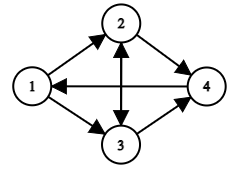

In [7]:
edges: list[Edge] = [Edge(1, 2, 1),
                     Edge(1, 3, 1),
                     Edge(2, 3, 5),
                     Edge(2, 4, 5),
                     Edge(3, 2, 1),
                     Edge(3, 4, 5),
                     Edge(4, 1, 1),
                     Edge(4, np.Inf, 0)]  # (4, inf)
number_node = 4
A = build_matrix(number_node, edges)
A


array([[ 1.,  1.,  0.,  0.,  0.,  0., -1.,  0.],
       [-1.,  0.,  1.,  1., -1.,  0.,  0.,  0.],
       [ 0., -1., -1.,  0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0., -1.,  1.,  1.]])

In [8]:
basic_var = [1, 2, 5, -1]
A[:, basic_var]

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [-1., -1.,  1.,  0.],
       [ 0.,  0., -1.,  1.]])

#### Ejemplo 2

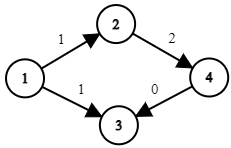

In [9]:
edges = [Edge(1, 2, 1),
         Edge(1, 3, 1),
         Edge(2, 4, 2),
         Edge(4, 3, 0),
         Edge(4, np.Inf, 0)]  # (4, inf)
number_node = 4
A = build_matrix(number_node, edges)
A


array([[ 1.,  1.,  0.,  0.,  0.],
       [-1.,  0.,  1.,  0.,  0.],
       [ 0., -1.,  0., -1.,  0.],
       [ 0.,  0., -1.,  1.,  1.]])

#### Ejemplo 3


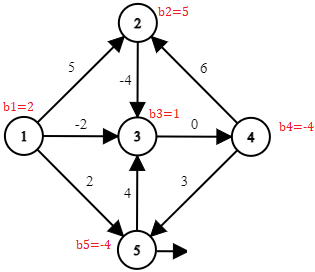

In [10]:
number_nodes = 5
edges: list[Edge] = [Edge(1, 2, 5),
                     Edge(1, 3, -2),
                     Edge(1, 5, 2),
                     Edge(2, 3, -4),
                     Edge(3, 4, 0),
                     Edge(4, 2, 6),
                     Edge(4, 5, 3),
                     Edge(5, 3, 4),
                     Edge(5, np.Inf, 0)]

A = build_matrix(number_nodes, edges)
b = np.array([2, 5, 1, -4, -4.])  # sum(b) = 0
c = np.array(list(map(lambda e: e.cost, edges)))
print("Matriz A\n", A)

var = set(range(len(edges)))
basic_var = [2, 3, 4, 6, 8]
basic_edges = get_edges(edges, basic_var)
print(f"variables básicas\nBI = {basic_var}")
print_vector("map", "a", [r"x_{%s}" % i for i in basic_var], basic_edges)

B = A[:, basic_var]
print(f"Matriz B\n{B}")
x_sol = np.linalg.inv(B) @ b
print_vector("solución básica (flujos)", "a", x_sol, basic_edges)


Matriz A
 [[ 1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  1.  0. -1.  0.  0.  0.]
 [ 0. -1.  0. -1.  1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. -1.  1.  1.  0.  0.]
 [ 0.  0. -1.  0.  0.  0. -1.  1.  1.]]
variables básicas
BI = [2, 3, 4, 6, 8]


Matriz B
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.]
 [ 0.  0. -1.  1.  0.]
 [-1.  0.  0. -1.  1.]]


Solución dual
$$\mathbf w^*  = {(B^{-1})}^T\mathbf{c}_{BI}$$



In [11]:
w = np.linalg.inv(B).T @ c[basic_var]
# en el dibujo de flujo en redes, situo la wi en la cola del enlace aij
print_vector("variable dual", "w", w)


\begin{equation}
\mathbf{c}_{NI}^T - \mathbf{c}_{BI}^TB^{-1}N = z_{ij} - c_{ij} = w a_{ij} - c_{ij}
\end{equation}

Para el caso no básico (caso básico es 0) la expresión anterior en la optimalidad  puede expresarse como

\begin{align*}
w a_{ij} - c_{ij}\le 0\\
w (e_i - e_j) - c_{ij}\le 0\\
w_i - w_j - c_{ij}\le 0
\end{align*}

Donde $a_{ij}$ es la columna asociada a la arista a los nodos $i, j$. Para que sea óptimal todos los enlaces no básicos deben ser negativos 


In [12]:
non_basic_var = list(var - set(basic_var))
non_basic_edges = get_edges(edges, non_basic_var)
# aún no es negativo, lo cambiamos
z = w @ A[:, non_basic_var] - c[non_basic_var]
print_vector("costos no básicos", "w", z, non_basic_edges)

$w_{(1, 3)} = 1$ no es negativo, es nuestra nueva variable básica. Hallando el flujo en un circuito, sacamos aquella cuyo flujo es negativo. Por lo que nuestras nueva variables básicas son:

In [13]:
col = non_basic_var[max_criterion(z)]
print(f"Entra x[{col}]")


Entra x[1]


Sale el menor que está opuesto al flujo del que entra, arista $x_2=a_{(1, 5)}$

In [14]:
basic_var = [1, 3, 4, 6, 8]
basic_edges = get_edges(edges, basic_var)
B = A[:, basic_var]
print(f"variables básicas\nBI = {basic_var}")
print_vector("map", "a", [r"x_{%s}" % i for i in basic_var], basic_edges)

B = A[:, basic_var]
print(f"Matriz B\n{B}")
x_sol = np.linalg.inv(B) @ b
print_vector("solución básica (flujos)", "a", x_sol, basic_edges)


variables básicas
BI = [1, 3, 4, 6, 8]


Matriz B
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [-1. -1.  1.  0.  0.]
 [ 0.  0. -1.  1.  0.]
 [ 0.  0.  0. -1.  1.]]


Calculando $w a_{ij} - c_{ij}$ o en su forma matricial $\mathbf w N - c_{NI}$ y seleccionando el más positivo para que sea la nueva variable básica. Termina cuando todos son negativos.

In [15]:
w = np.linalg.inv(B).T @ c[basic_var]
# en el dibujo de flujo en redes, situo la wi en la cola del enlace aij
print_vector("variable dual", "w", w)

non_basic_var = list(var - set(basic_var))
non_basic_edges = get_edges(edges, non_basic_var)
# aún no es negativo, lo cambiamos
z = w @ A[:, non_basic_var] - c[non_basic_var]
print_vector("costos no básicos", "w", z, non_basic_edges)

#### Ejemplo 4


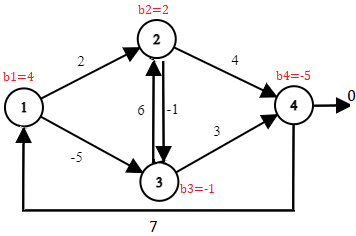

In [16]:
number_nodes = 4
edges: list[Edge] = [Edge(1, 2, 2),
                     Edge(1, 3, -5),
                     Edge(2, 3, -1),
                     Edge(2, 4, 4),
                     Edge(3, 2, 6),
                     Edge(3, 4, 3),
                     Edge(4, 1, 7),
                     Edge(4, np.Inf, 0)]

A = build_matrix(number_nodes, edges)
b = np.array([4, 2, -1, -5])  # sum(b) = 0
c = np.array(list(map(lambda e: e.cost, edges)))
var = set(range(len(edges)))


In [17]:
basic_var = [0, 2, 3, 7]
basic_edges = get_edges(edges, basic_var)
print(f"variables básicas\nBI = {basic_var}")
print_vector("map", "a", [r"x_{%s}" % i for i in basic_var], basic_edges)

B = A[:, basic_var]
print(f"Matriz B\n{B}")
x_sol = np.linalg.inv(B) @ b
print_vector("solución básica (flujos)", "a", x_sol, basic_edges)

# solución dual
w = np.linalg.inv(B).T @ c[basic_var]
# en el dibujo de flujo en redes, situo la wi en la cola del enlace aij
print_vector("variable dual", "w", w)

non_basic_var = list(var - set(basic_var))
non_basic_edges = get_edges(edges, non_basic_var)
# aún no es negativo, lo cambiamos
z = w @ A[:, non_basic_var] - c[non_basic_var]
print_vector("costos no básicos", "w", z, non_basic_edges)


variables básicas
BI = [0, 2, 3, 7]


Matriz B
[[ 1.  0.  0.  0.]
 [-1.  1.  1.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -1.  1.]]


In [18]:
# Puedo elegir cualquier arista positiva pero elijo la arista mas positiva, segunda arista
col = 1 # hallado gráficamente
# Calculando el flujo circular a favor de la nueva arista sale dos que estan en contra aplico el test de minimo ratio
row = 1  # hallado gráficamente
basic_var[row] = col
basic_edges = get_edges(edges, basic_var)
print(f"variables básicas\nBI = {basic_var}")
print_vector("map", "a", [r"x_{%s}" % i for i in basic_var], basic_edges)

B = A[:, basic_var]
print(f"Matriz B\n{B}")
x_sol = np.linalg.inv(B) @ b
print_vector("solución básica (flujos)", "a", x_sol, basic_edges)

# solución dual
w = np.linalg.inv(B).T @ c[basic_var]
# en el dibujo de flujo en redes, situo la wi en la cola del enlace aij
print_vector("variable dual", "w", w)

non_basic_var = list(var - set(basic_var))
non_basic_edges = get_edges(edges, non_basic_var)
# aún no es negativo, lo cambiamos
z = w @ A[:, non_basic_var] - c[non_basic_var]
print_vector("costos no básicos", "w", z, non_basic_edges)


variables básicas
BI = [0, 1, 3, 7]


Matriz B
[[ 1.  1.  0.  0.]
 [-1.  0.  1.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -1.  1.]]


In [19]:
col = 5
row = 0 # hallado gráficamente 
basic_var[row] = col
basic_edges = get_edges(edges, basic_var)
print(f"variables básicas\nBI = {basic_var}")
print_vector("map", "a", [r"x_{%s}" % i for i in basic_var], basic_edges)

B = A[:, basic_var]
print(f"Matriz B\n{B}")
x_sol = np.linalg.inv(B) @ b
print_vector("solución básica (flujos)", "a", x_sol, basic_edges)

# solución dual
w = np.linalg.inv(B).T @ c[basic_var]
# en el dibujo de flujo en redes, situo la wi en la cola del enlace aij
print_vector("variable dual", "w", w)

non_basic_var = list(var - set(basic_var))
non_basic_edges = get_edges(edges, non_basic_var)
# aún no es negativo, lo cambiamos
z = w @ A[:, non_basic_var] - c[non_basic_var]
print_vector("costos no básicos", "w", z, non_basic_edges)

variables básicas
BI = [5, 1, 3, 7]


Matriz B
[[ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 1. -1.  0.  0.]
 [-1.  0. -1.  1.]]


In [20]:
col = 2 # entra, hallado gráficamente 
row = 2 # sale, hallado gráficamente 
basic_var[row] = col
basic_edges = get_edges(edges, basic_var)
print(f"variables básicas\nBI = {basic_var}")
print_vector("map", "a", [r"x_{%s}" % i for i in basic_var], basic_edges)

B = A[:, basic_var]
print(f"Matriz B\n{B}")
x_sol = np.linalg.inv(B) @ b
print_vector("solución básica (flujos)", "a", x_sol, basic_edges)

# solución dual
w = np.linalg.inv(B).T @ c[basic_var]
# en el dibujo de flujo en redes, situo la wi en la cola del enlace aij
print_vector("variable dual", "w", w)

non_basic_var = list(var - set(basic_var))
non_basic_edges = get_edges(edges, non_basic_var)
# aún no es negativo, lo cambiamos
z = w @ A[:, non_basic_var] - c[non_basic_var]
print_vector("costos no básicos", "w", z, non_basic_edges)

variables básicas
BI = [5, 1, 2, 7]


Matriz B
[[ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 1. -1. -1.  0.]
 [-1.  0.  0.  1.]]


Óptimo

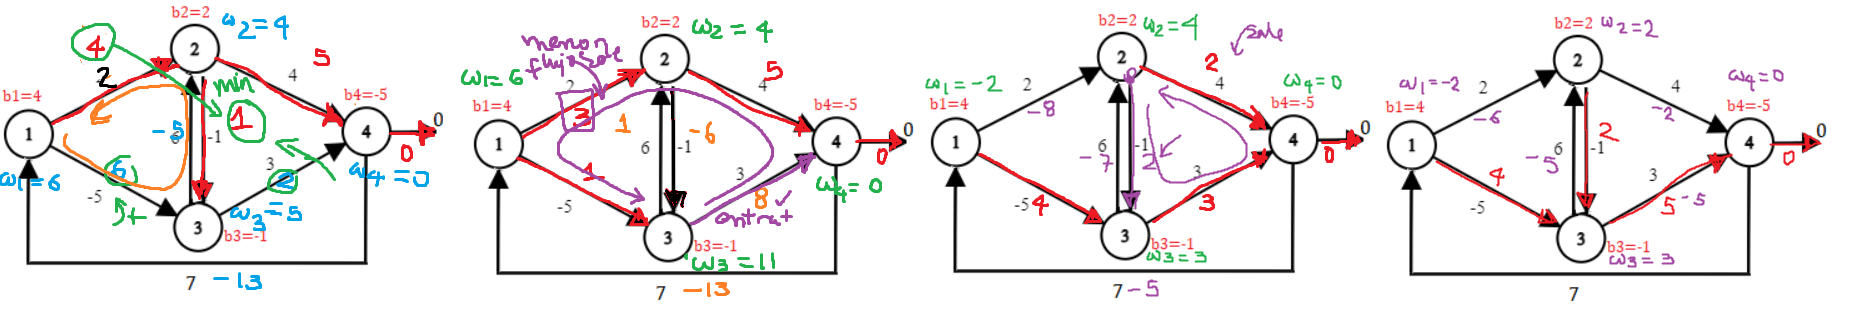

### Examen final 2021-II

#### 1. Resolver el siguiente problema de flujo en red de costo mínimo con valores $b_i$ en los nodos y valores $c_{ij}$ en los arcos. (Utilizando la teoría de grafos y árboles). (8 ptos)

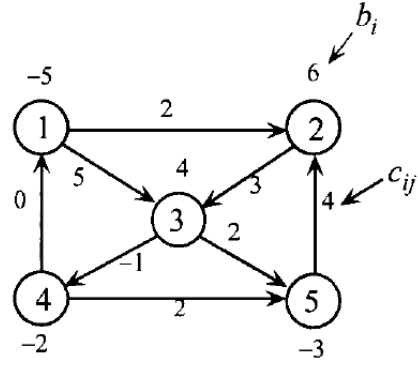

In [21]:
number_nodes = 5
edges: list[Edge] = [Edge(1, 3, 5),
                     Edge(1, 2, 2),
                     Edge(2, 3, 3),
                     Edge(3, 4, -1),
                     Edge(3, 5, 2),
                     Edge(4, 1, 0),
                     Edge(4, 5, 2),
                     Edge(5, 2, 4),
                     Edge(5, np.Inf, 0)]

A = build_matrix(number_nodes, edges)
b = np.array([-5, 6, 4, -2, -3])  # sum(b) = 0
c = np.array(list(map(lambda e: e.cost, edges)))
var = set(range(len(edges)))


In [22]:
basic_var = [5, 2, 3, 6, 8]
basic_edges = get_edges(edges, basic_var)
print(f"variables básicas\nBI = {basic_var}")
print_vector("map", "a", [r"x_{%s}" % i for i in basic_var], basic_edges)

B = A[:, basic_var]
print(f"Matriz B\n{B}")
x_sol = np.linalg.inv(B) @ b
print_vector("solución básica (flujos)", "a", x_sol, basic_edges)

# solución dual
w = np.linalg.inv(B).T @ c[basic_var]
# en el dibujo de flujo en redes, situo la wi en la cola del enlace aij
print_vector("variable dual", "w", w)

non_basic_var = list(var - set(basic_var))
non_basic_edges = get_edges(edges, non_basic_var)
# aún no es negativo, lo cambiamos
z = w @ A[:, non_basic_var] - c[non_basic_var]
print_vector("costos no básicos", "w", z, non_basic_edges)


variables básicas
BI = [5, 2, 3, 6, 8]


Matriz B
[[-1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.]
 [ 1.  0. -1.  1.  0.]
 [ 0.  0.  0. -1.  1.]]


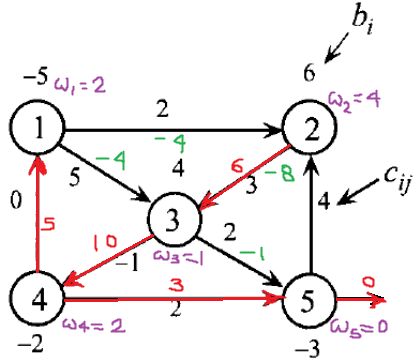

Óptimo